# First Problem

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 1. read data

data1 = pd.read_csv("train.csv")
print(data1.shape)
data1.head()



(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# 2. Count of Null Values in Columns

data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# 3. Dealing with null values

data1["Age"] = data1["Age"].fillna(data1["Age"].median())

In [6]:
data1["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [7]:
data1["Embarked"] = data1["Embarked"].fillna(data1["Embarked"].mode()[0])
data1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


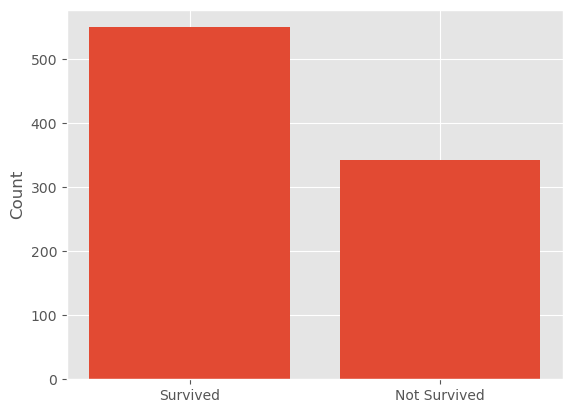

In [8]:
# 4a

plt.style.use("ggplot")
Survived_count = data1["Survived"].value_counts().to_list()
plt.bar(['Survived','Not Survived'],Survived_count)
plt.ylabel("Count");

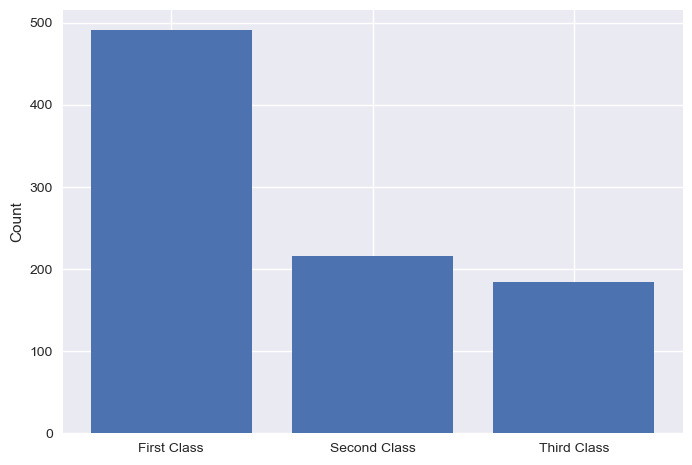

In [9]:
#4b

plt.style.use("seaborn")

Pclass_count = data1["Pclass"].value_counts().to_list()
plt.bar(['First Class', 'Second Class', 'Third Class'],Pclass_count)
plt.ylabel("Count");

Text(0.5, 1.0, ' Count According to gender')

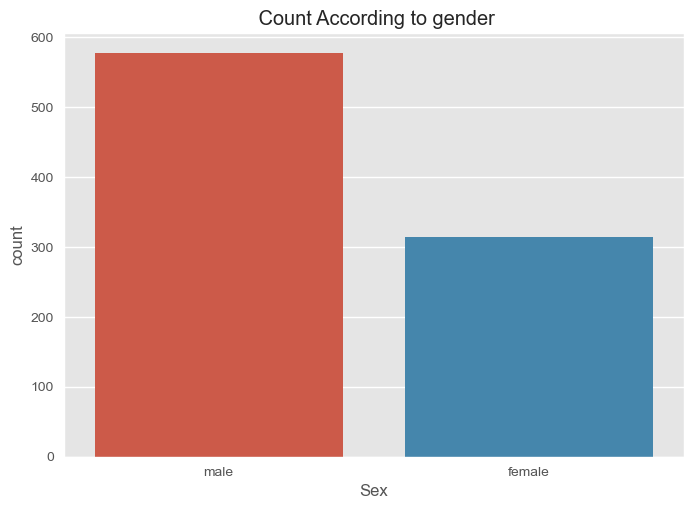

In [10]:
#4c

plt.style.use("ggplot")
sns.countplot(x ='Sex', data = data1)
plt.title(" Count According to gender")

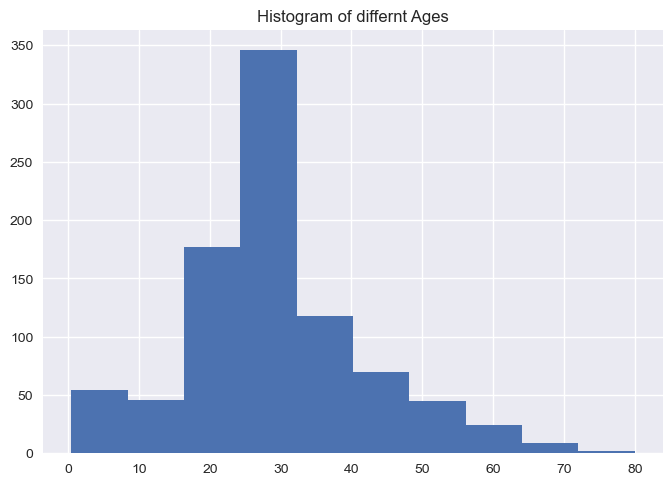

In [11]:
#4.d

plt.style.use("seaborn")

plt.hist(data1["Age"])
plt.title('Histogram of differnt Ages');

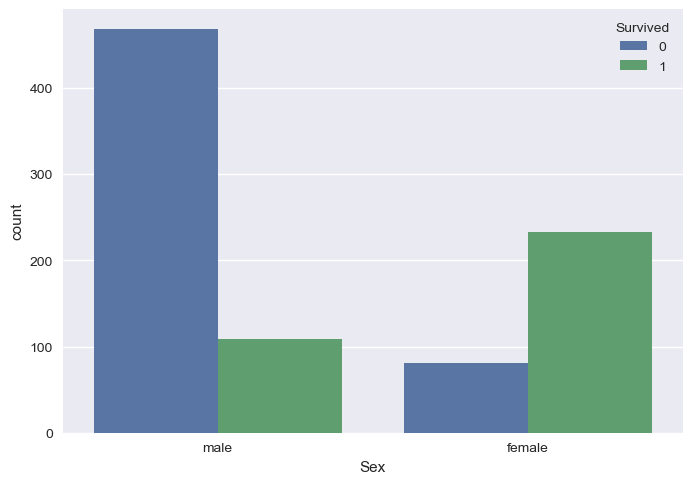

In [12]:
sns.countplot(data1["Sex"], hue=data1["Survived"])
plt.show()

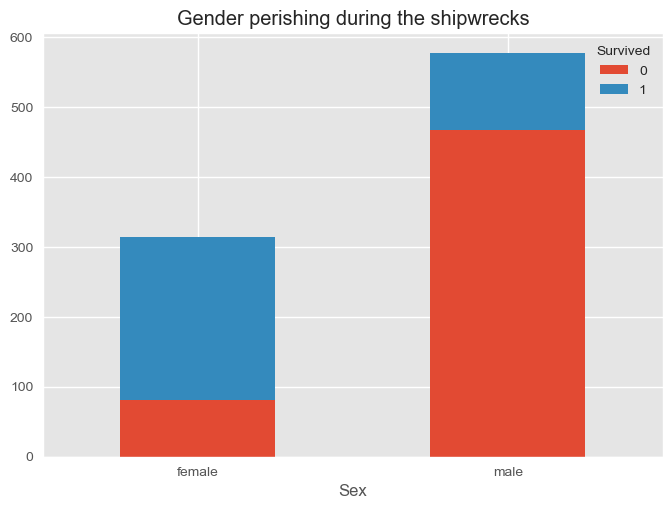

In [13]:
#4.e

# df.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', stacked=True,width=0.2)

plt.style.use("ggplot")
a= data1.groupby(['Sex', 'Survived']).size().unstack()
a.plot(kind="bar", stacked=True)
plt.xticks(rotation = 0)
plt.title("Gender perishing during the shipwrecks");

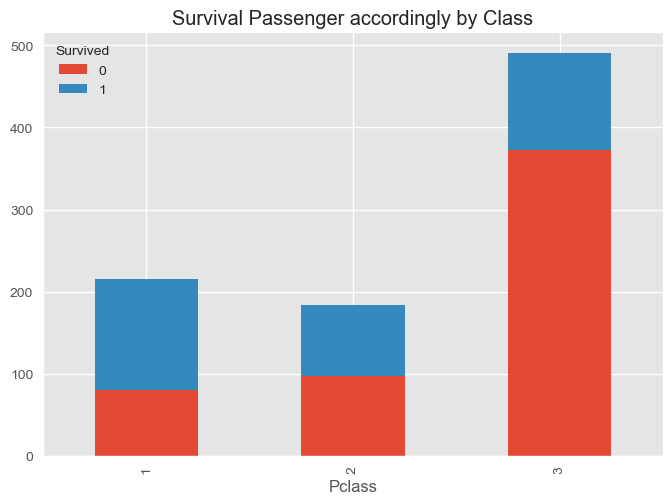

In [14]:


b = data1.groupby(['Pclass', 'Survived']).size().unstack()
b.plot(kind='bar', stacked=True)
plt.title("Survival Passenger accordingly by Class");

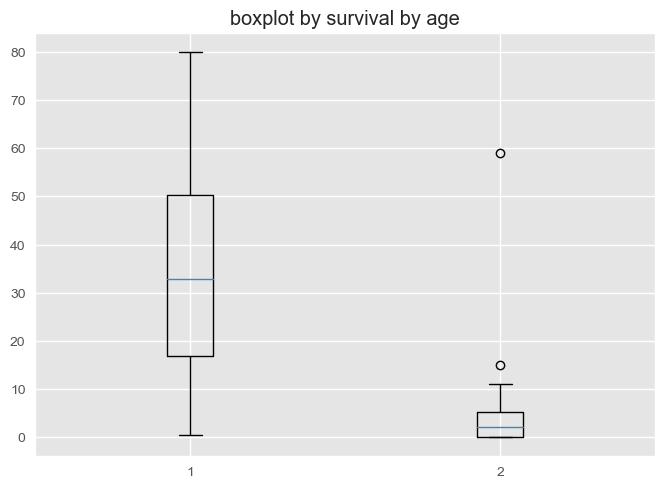

In [15]:
#4f

c = data1[["Survived","Age"]].groupby("Age",as_index=False).sum()
plt.boxplot(c)
plt.title("boxplot by survival by age");



# Second Problem


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data2 = pd.read_excel("Sample - Superstore.xls")
print(data2.shape)
data2.head()

(9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [17]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [18]:
# Display Subcategory wise sum of profit

Sub_Category_profit = data2["Profit"].groupby(data2["Sub-Category"]).sum()
Sub_Category_profit

Sub-Category
Accessories    41936.6357
Appliances     18138.0054
Art             6527.7870
Binders        30221.7633
Bookcases      -3472.5560
Chairs         26590.1663
Copiers        55617.8249
Envelopes       6964.1767
Fasteners        949.5182
Furnishings    13059.1436
Labels          5546.2540
Machines        3384.7569
Paper          34053.5693
Phones         44515.7306
Storage        21278.8264
Supplies       -1189.0995
Tables        -17725.4811
Name: Profit, dtype: float64

In [19]:
# Sort SubCategory in Desc order

SubCategory = data2['Sub-Category'].sort_values(ascending=False)
SubCategory

4683         Tables
8783         Tables
4264         Tables
3496         Tables
2664         Tables
           ...     
9317    Accessories
3899    Accessories
3901    Accessories
3932    Accessories
6912    Accessories
Name: Sub-Category, Length: 9994, dtype: object

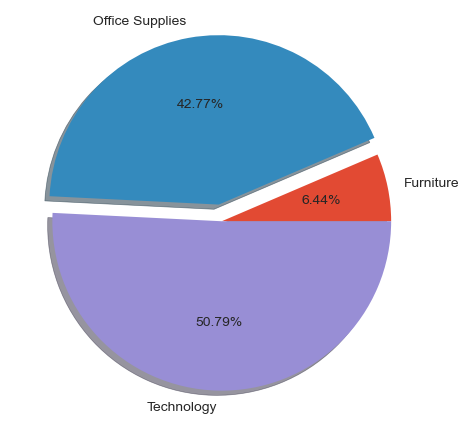

In [20]:
# Categorywise sum of profit in pie chart

Categorywise_profit = data2["Profit"].groupby(data2["Category"]).sum()
plt.pie(Categorywise_profit.values, labels= Categorywise_profit.index, autopct='%1.2f%%', shadow= True, explode = (0, 0.1, 0));

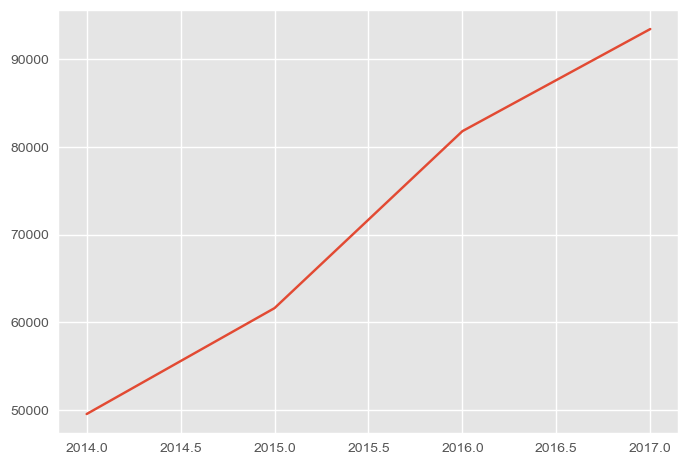

In [21]:
# Line Chart yearwise sum of profit

yearwise_profit= data2['Profit'].groupby(data2["Order Date"].dt.year).sum()
plt.plot(yearwise_profit);

In [22]:
# Display Top 10 most profitable customers

profitable_customers =data2['Profit'].groupby(data2["Customer Name"]).sum().sort_values(ascending=False)
profitable_customers[:10]

Customer Name
Tamara Chand            8981.3239
Raymond Buch            6976.0959
Sanjit Chand            5757.4119
Hunter Lopez            5622.4292
Adrian Barton           5444.8055
Tom Ashbrook            4703.7883
Christopher Martinez    3899.8904
Keith Dawkins           3038.6254
Andy Reiter             2884.6208
Daniel Raglin           2869.0760
Name: Profit, dtype: float64

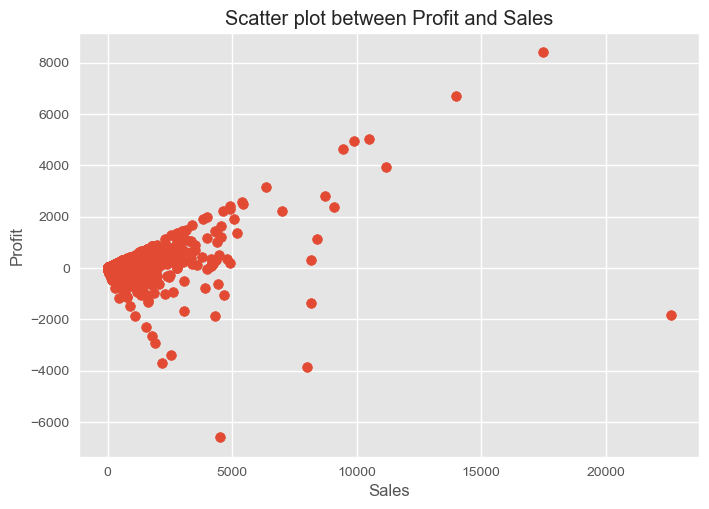

In [23]:
plt.scatter(data2['Sales'], data2['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.title("Scatter plot between Profit and Sales");

# Q6.

In [24]:
import pandas as pd

a = pd.DataFrame({
    'Deptno':[1,2,3],
    'Dname':['a','x','c'],
    'Loc':['z','l','d']
})

a

,Deptno,Dname,Loc
0,1,a,z
1,2,x,l
2,3,c,d


In [25]:
b = pd.DataFrame({
    'Deptno':[1,5,6,7,8],
    'Eno':[101, 105,103,111, 107],
    'Sal':[10000,20000,30000, 40000,50000]
})
b

,Deptno,Eno,Sal
0,1,101,10000
1,5,105,20000
2,6,103,30000
3,7,111,40000
4,8,107,50000


In [26]:
outer = pd.merge(a,b,on='Deptno',how='outer')
outer

,Deptno,Dname,Loc,Eno,Sal
0,1,a,z,101.0,10000.0
1,2,x,l,NaN,NaN
2,3,c,d,NaN,NaN
3,5,NaN,NaN,105.0,20000.0
4,6,NaN,NaN,103.0,30000.0
5,7,NaN,NaN,111.0,40000.0
6,8,NaN,NaN,107.0,50000.0


In [27]:
inner = pd.merge(a,b,on='Deptno',how='inner')
inner

,Deptno,Dname,Loc,Eno,Sal
0,1,a,z,101,10000


In [28]:
left = pd.merge(a,b,on='Deptno',how='left')
left

,Deptno,Dname,Loc,Eno,Sal
0,1,a,z,101.0,10000.0
1,2,x,l,NaN,NaN
2,3,c,d,NaN,NaN


In [29]:
right = pd.merge(a,b,on='Deptno',how='right')
right

,Deptno,Dname,Loc,Eno,Sal
0,1,a,z,101,10000
1,5,NaN,NaN,105,20000
2,6,NaN,NaN,103,30000
3,7,NaN,NaN,111,40000
4,8,NaN,NaN,107,50000


# Q7.

Suppose the height of men in the United Kingdom is known to be normally distributed with a mean of 177 centimeters and a standard deviation of 10 centimeters. If you were to select a man from the United Kingdom population at random, what is the probability that he would be more than 200 centimeters tall? Ans: We are given that the height of men in the United Kingdom is normally distributed with a mean of 177 centimeters and a standard deviation of 10 centimeters. Let X be the height of a randomly selected man from the population.

Ans:---

We can use the standard normal distribution to answer this question. First, we need to standardize the value of 200 centimeters using the formula:

z = (x - mu) / sigma

where x is the height we want to find the probability for, mu is the population mean, and sigma is the population standard deviation.

Plugging in the values, we get:

z = (200 - 177) / 10
z = 2.3

Now, we can use a standard normal distribution table or calculator to find the probability of a value being greater than 2.3 standard deviations above the mean. The probability can be found by looking up the area to the right of 2.3 on the standard normal distribution curve. Using a calculator or table, we find that this area is approximately 0.0107.

Therefore, the probability that a randomly selected man from the United Kingdom population is more than 200 centimeters tall is approximately 0.0107 or 1.07%.

# Q8.

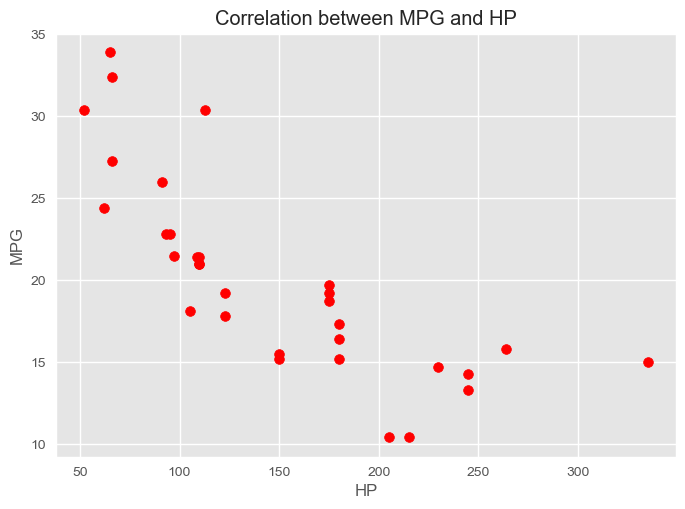

In [30]:
import matplotlib.pyplot as plt

mpg = [21.0, 21.0, 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 22.8, 19.2, 17.8, 16.4, 17.3, 15.2, 10.4, 10.4, 14.7, 32.4, 30.4,33.9, 21.5, 15.5, 15.2, 13.3, 19.2, 27.3, 26.0, 30.4, 15.8, 19.7, 15.0, 21.4]

hp = [110, 110, 93, 110, 175, 105, 245, 62, 95, 123, 123, 180, 180, 180, 205, 215, 230, 66, 52, 65, 97, 150, 150, 245, 175, 66, 91, 113, 264, 175, 335, 109]

plt.scatter(hp, mpg,color='red')
plt.xlabel("HP")
plt.ylabel("MPG")
plt.title("Correlation between MPG and HP")
plt.show()

#As we increses HP ,MPG gone decreases. 

# Q9.

In [31]:
import scipy.stats as stats
import numpy as np

class1 = np.array([45.0, 40.0, 49.0, 52.0, 54.0, 64.0, 36.0, 41.0, 42.0, 34.0])

class2 = np.array([75.0, 85.0, 53.0, 70.0, 72.0, 93.0, 61.0, 65.0, 65.0, 72.0])

ans = stats.ttest_ind(a=class1, b=class2, equal_var=True)
print(ans)


Ttest_indResult(statistic=-5.458195056848408, pvalue=3.482072285015316e-05)


# Q10.

The mean score of the mathematics exam at a national level is 60 marks and the standard deviation is 3 marks. The mean marks of a class are 53. The null hypothesis is that the mean marks of the class are similar to the national average. Test this Hypothesis using Z – Test. Ans: Math Test Z-Test Result. we can use a Z-test since we know the population mean and standard deviation to test this. The null hypothesis is : H0: μ = 60 The alternative hypothesis is : Ha: μ ≠ 60 sample mean = 53, Z = (X̄ - μ) / (σ / √n)

Ans:---

Z = (53 - 60) / (3 / √1) Z = -2.333

from standard normal distribution -2.333 or lower, auc is 0.0099

This means that the probability of obtaining a sample mean of 53 or lower, assuming the null hypothesis is true, is only 0.0099 or 0.99%. This is a very low probability, so we can reject the null hypothesis at the 5% significance level. Therefore, we can conclude that the mean marks of the class are significantly lower than the national average.

# Q11.

In [32]:
from scipy.stats import pearsonr

data3 = pd.read_csv("trees.csv")
data3.head()
corr, _ = pearsonr(data3.Girth, data3.Volume)
print('Pearsons correlation: %.2f' % corr)

Pearsons correlation: 0.97


# Q12.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("Automobile price data _Raw_.csv")
print(df.shape)
df.head()

(205, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [35]:
df['normalized-losses'] = df['normalized-losses'].apply(lambda x: np.nan if x == '?' else x) 
df['normalized-losses'] = df['normalized-losses'].fillna(df['normalized-losses'].median())

df['normalized-losses']

0      115.0
1      115.0
2      115.0
3        164
4        164
       ...  
200       95
201       95
202       95
203       95
204       95
Name: normalized-losses, Length: 205, dtype: object

In [36]:
df['num-of-doors'] = df['num-of-doors'].replace(['two'],2)
df['num-of-doors'] = df['num-of-doors'].replace(['four'],4)
df['num-of-doors'] = df['num-of-doors'].replace(['?'],df['num-of-doors'].mode()[0])

df['num-of-doors']

0      2
1      2
2      2
3      4
4      4
      ..
200    4
201    4
202    4
203    4
204    4
Name: num-of-doors, Length: 205, dtype: int64

In [37]:
df['num-of-cylinders'] = df['num-of-cylinders'].replace(['two'],2)
df['num-of-cylinders'] = df['num-of-cylinders'].replace(['three'],3)
df['num-of-cylinders'] = df['num-of-cylinders'].replace(['four'],4)
df['num-of-cylinders'] = df['num-of-cylinders'].replace(['five'],5)
df['num-of-cylinders'] = df['num-of-cylinders'].replace(['six'],6)
df['num-of-cylinders'] = df['num-of-cylinders'].replace(['eight'],8)
df['num-of-cylinders'] = df['num-of-cylinders'].replace(['twelve'],12)


df['num-of-cylinders']

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: num-of-cylinders, Length: 205, dtype: int64

In [38]:
df['bore'] = df['bore'].apply(lambda x: np.nan if x == '?' else x) 
df['bore'] = df['bore'].fillna(df['bore'].median())

df['bore']

0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: object

In [39]:
df['stroke'].unique()

array(['2.68', '3.47', '3.40', '2.80', '3.19', '3.39', '3.03', '3.11',
       '3.23', '3.46', '3.90', '3.41', '3.07', '3.58', '4.17', '2.76',
       '3.15', '?', '3.16', '3.64', '3.10', '3.35', '3.12', '3.86',
       '3.29', '3.27', '3.52', '2.19', '3.21', '2.90', '2.07', '2.36',
       '2.64', '3.08', '3.50', '3.54', '2.87'], dtype=object)

In [40]:
df['stroke'] = df['stroke'].apply(lambda x: np.nan if x == '?' else x) 
df['stroke'] = df['stroke'].fillna(df['stroke'].median())

df['stroke']

0      2.68
1      2.68
2      3.47
3      3.40
4      3.40
       ... 
200    3.15
201    3.15
202    2.87
203    3.40
204    3.15
Name: stroke, Length: 205, dtype: object

In [41]:
df['horsepower'] = df['horsepower'].apply(lambda x: np.nan if x == '?' else x) 
df['horsepower'] = df['horsepower'].fillna(df['stroke'].median())

df['horsepower']

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: object

In [42]:
df['peak-rpm'] = df['peak-rpm'].apply(lambda x: np.nan if x == '?' else x) 
df['peak-rpm'] = df['peak-rpm'].fillna(df['peak-rpm'].median())

df['peak-rpm']

0      5000
1      5000
2      5000
3      5500
4      5500
       ... 
200    5400
201    5300
202    5500
203    4800
204    5400
Name: peak-rpm, Length: 205, dtype: object

In [43]:
df['price'].unique()
df['price'] = df['price'].apply(lambda x: np.nan if x == '?' else x) 
df['price'] = df['price'].fillna(df['price'].median())

df['price']

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object

In [44]:
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], downcast='float')
df['num-of-doors'] = pd.to_numeric(df['num-of-doors'], downcast='float')
df['num-of-cylinders'] = pd.to_numeric(df['num-of-cylinders'], downcast='float')
df['bore'] = pd.to_numeric(df['bore'], downcast='float')
df['stroke'] = pd.to_numeric(df['stroke'], downcast='float')
df['horsepower'] = pd.to_numeric(df['horsepower'], downcast='float')
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], downcast='float')
df['price'] = pd.to_numeric(df['price'], downcast='float')
print(df.dtypes)

symboling              int64
normalized-losses    float32
make                  object
fuel-type             object
aspiration            object
num-of-doors         float32
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders     float32
engine-size            int64
fuel-system           object
bore                 float32
stroke               float32
compression-ratio    float64
horsepower           float32
peak-rpm             float32
city-mpg               int64
highway-mpg            int64
price                float32
dtype: object


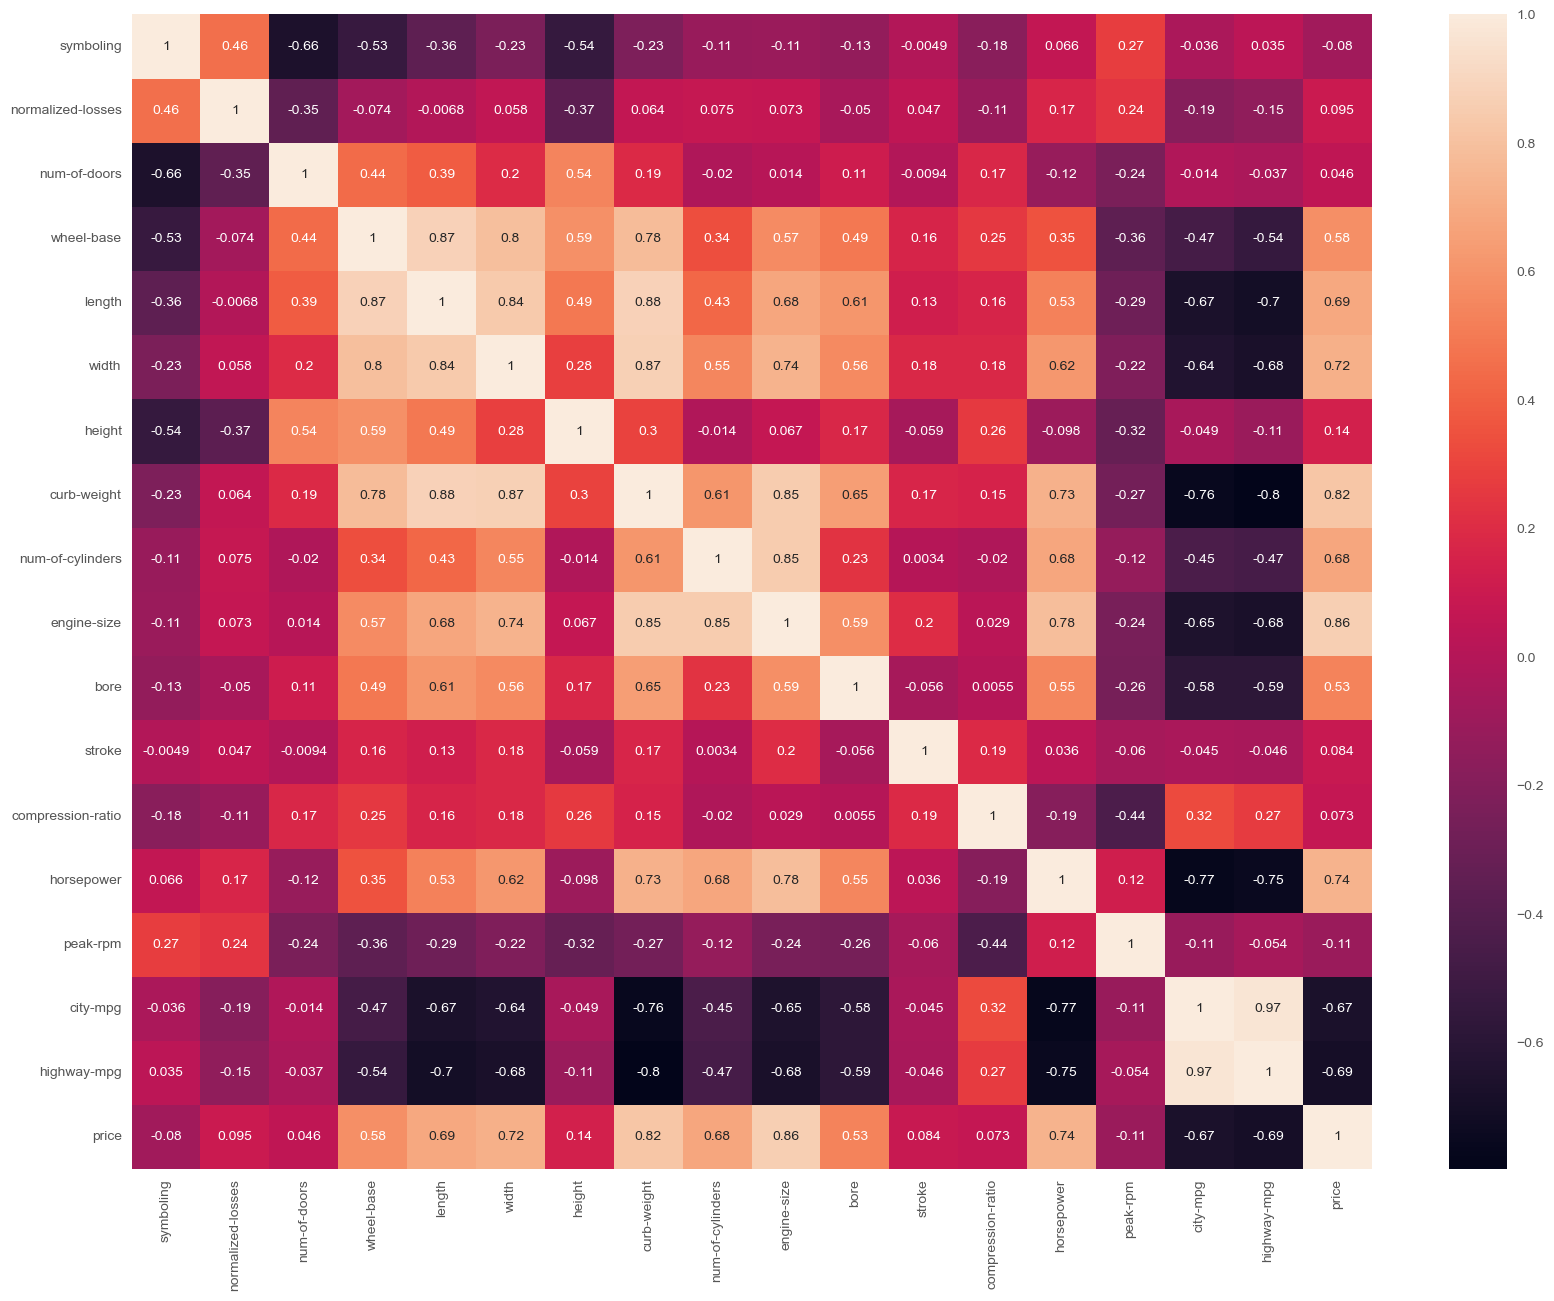

In [45]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [46]:
dum = pd.get_dummies(df, columns = ['make','fuel-type','aspiration','body-style','drive-wheels','engine-location','engine-type','fuel-system'])

In [47]:
dum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   normalized-losses       205 non-null    float32
 2   num-of-doors            205 non-null    float32
 3   wheel-base              205 non-null    float64
 4   length                  205 non-null    float64
 5   width                   205 non-null    float64
 6   height                  205 non-null    float64
 7   curb-weight             205 non-null    int64  
 8   num-of-cylinders        205 non-null    float32
 9   engine-size             205 non-null    int64  
 10  bore                    205 non-null    float32
 11  stroke                  205 non-null    float32
 12  compression-ratio       205 non-null    float64
 13  horsepower              205 non-null    float32
 14  peak-rpm                205 non-null    fl

In [48]:
test = dum.copy()

test.drop(['price'], axis=1)
x = test
y = dum.price 

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
model.fit(x_train,y_train)
y_new = model.predict(x_test)

r = r2_score(y_test,y_new)
print(r)

1.0


In [50]:
y_new

array([ 5118.,  9989., 10945., 15040., 17450., 36880.,  9495.,  7788.,
        7957., 16925.,  6229.,  9549.,  6692., 18399.,  5572.,  9279.,
       11595., 13415.,  9279., 16515., 14489., 12290., 16900.,  6989.,
        7609., 22470.,  5195., 10898., 35056.,  6529., 11850.,  7603.,
        9298.,  6377.,  6229., 18150., 15985., 13200.,  8499.,  7689.,
       10795.])

# Q13.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("diabetes.csv")
print(df.shape)
df.head()

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [54]:
x= df.loc[:,df.columns != "Outcome"]
y = df["Outcome"]

from sklearn import linear_model
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

model_log=linear_model.LogisticRegression()
model_log.fit(x_train,y_train)

LogisticRegression()

In [63]:
pred = model_log.predict(x_test)

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test  , pred )

0.7337662337662337

In [66]:
cm = confusion_matrix(y_test  , pred )
cm

array([[83, 18],
       [23, 30]], dtype=int64)

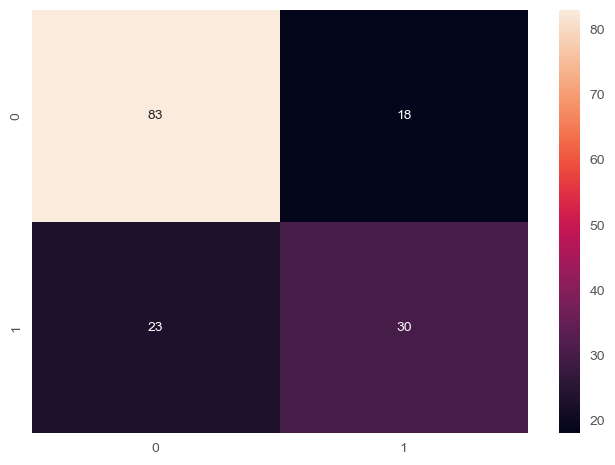

In [68]:
sns.heatmap(cm, annot= True);

# Q14.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("hotel.csv")
print(df.shape)
df.head()

(300, 7)


,hotel_id,base_price,big_area_name,small_area_name,hotel_latitude,hotel_longitude,is_business
0,h_1,26100,D,D-2,43.064569,141.511397,True
1,h_2,26400,A,A-1,35.715320,139.939446,True
2,h_3,41300,E,E-4,35.281572,136.988565,False
3,h_4,5200,C,C-3,38.431293,140.795615,False
4,h_5,13500,G,G-3,33.597291,130.533872,True


In [73]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)


km.fit(df.loc[:,["hotel_latitude", "hotel_longitude"]])

KMeans(n_clusters=3)

In [74]:
km.cluster_centers_

array([[ 39.54637369, 140.97323318],
       [ 34.10017301, 131.59516703],
       [ 35.61176541, 139.26035356]])

In [75]:
df['cluster'] = km.labels_

In [76]:
df.head(10)

,hotel_id,base_price,big_area_name,small_area_name,hotel_latitude,hotel_longitude,is_business,cluster
0,h_1,26100,D,D-2,43.064569,141.511397,True,0
1,h_2,26400,A,A-1,35.715320,139.939446,True,2
2,h_3,41300,E,E-4,35.281572,136.988565,False,2
3,h_4,5200,C,C-3,38.431293,140.795615,False,0
4,h_5,13500,G,G-3,33.597291,130.533872,True,1
5,h_6,49500,A,A-3,35.912764,139.731281,True,2
6,h_7,18900,C,C-2,38.328702,140.894969,False,0
7,h_8,12400,B,B-2,35.543318,139.798737,False,2
8,h_9,31400,C,C-1,38.232674,140.795693,False,0
9,h_10,5600,A,A-3,35.913874,139.931003,False,2


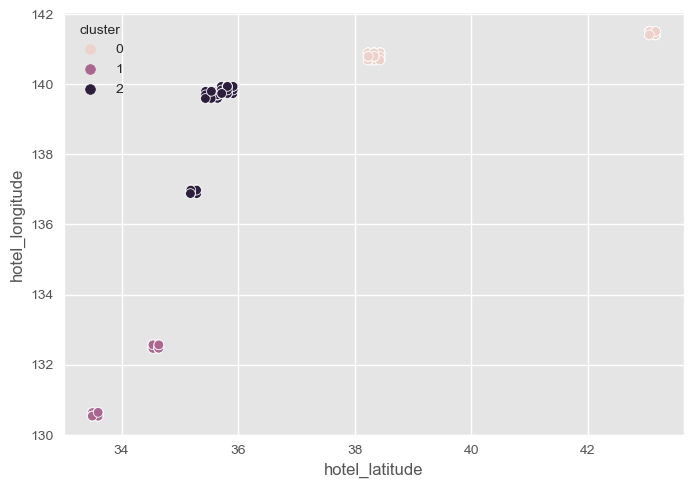

In [77]:
import seaborn as sns
sns.scatterplot(x='hotel_latitude',y='hotel_longitude',hue='cluster',data=df)
plt.show()